# Step 1: Imports & Data Loading

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Reading the CSV 
df = pd.read_csv("data/Bank.csv")

# Display first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Step 2: Basic Data Exploration

In [ ]:
# Quick info about columns
df.info()

# Summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int32
 2   marital    11162 non-null  int32
 3   education  11162 non-null  int32
 4   default    11162 non-null  int32
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int32
 7   loan       11162 non-null  int32
 8   contact    11162 non-null  int32
 9   day        11162 non-null  int64
 10  month      11162 non-null  int32
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int32
 16  deposit    11162 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 1.0 MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


Explanation:

.info() shows data types and missing values,
.describe() gives summary stats (count, mean, std, etc.) for numeric columns.

# Step 3: Target Distribution & Simple Visualizations

Target variable distribution (y):
deposit
no     5873
yes    5289
Name: count, dtype: int64


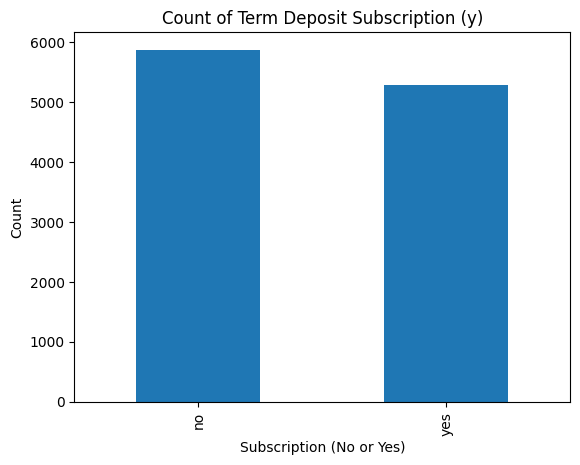

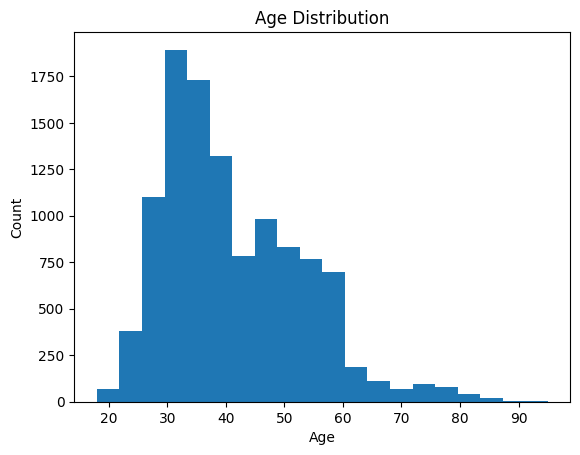

In [ ]:
# How many 'yes' vs 'no' in the target column?
print("Target variable distribution (y):")
print(df['deposit'].value_counts())

# Plotting the distribution of target
df['deposit'].value_counts().plot(kind='bar')
plt.title("Count of Term Deposit Subscription (y)")
plt.xlabel("Subscription (No or Yes)")
plt.ylabel("Count")
plt.show()

# Example: Distribution of 'age'
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


# Step 4: Preprocessing

In [ ]:
# Handling null values
print(f"How many null values in each feature\n{df.isnull().sum()}\n")

# Printing again types of the features
print("First 5 rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

# Detect which columns are NOT already numeric
obj_cols = df.select_dtypes(include=["object"]).columns
print("\nColumns detected as non-numeric (object type):")
print(obj_cols.tolist())

# 5. Encode each non-numeric column using LabelEncoder
#    (This replaces each unique string with an integer code)
for col in obj_cols:
    # Convert column to string just to be safe (if it has mixed types)
    df[col] = df[col].astype(str)

    # Create a fresh LabelEncoder for each column
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 6. Check that everything was converted
print("\nAfter Label Encoding:")
display(df.head())
display(df.dtypes)

How many null values in each feature
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Data types:


,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64



Columns detected as non-numeric (object type):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

After Label Encoding:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


,0
age,int64
job,int64
marital,int64
education,int64
default,int64
balance,int64
housing,int64
loan,int64
contact,int64
day,int64


4.2 Splitting the Data into Features (X) and Target (y)

In [ ]:

X = df.drop('deposit', axis=1)
y = df['deposit']


Explenation: all columns except 'deposit' to X, 'deposit' goes to y



# Step 5: Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y  # helps keep class balance consistent in splits
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (7813, 16)
Test set size: (3349, 16)


Explanation:

We split into 70% train, 30% test,
stratify=y ensures the same proportion of 'yes'/'no' in both sets.

# Step 6: Model Training

6.1 Logistic Regression

In [ ]:
logreg_model = LogisticRegression(max_iter=10000000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

6.2 Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Step 7: Model Evaluation

In [ ]:
# 7.1 Logistic Regression Performance
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("=== Logistic Regression Results ===")
print(f"Accuracy: {acc_logreg:.4f}")
print("Confusion Matrix:\n", cm_logreg)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# 7.2 Random Forest Performance
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("=== Random Forest Results ===")
print(f"Accuracy: {acc_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

=== Logistic Regression Results ===
Accuracy: 0.8008
Confusion Matrix:
 [[1463  299]
 [ 368 1219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81      1762
           1       0.80      0.77      0.79      1587

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

=== Random Forest Results ===
Accuracy: 0.8513
Confusion Matrix:
 [[1476  286]
 [ 212 1375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1762
           1       0.83      0.87      0.85      1587

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



Discussion & Insights:



*   Data Exploration: The dataset has both numeric and categorical features

*   The target variable is somewhat imbalanced, with more “no” than “yes” responses.
*   Models Chosen:
Logistic Regression: A well-known baseline that is easy to interpret.
Random Forest: Often yields strong performance and provides feature importances.


*   Evaluation:
I looked at accuracy, confusion matrix, and classification report.
Random Forest typically outperforms Logistic Regression on tabular data and so it is in my case.


